<a href="https://colab.research.google.com/github/aishwaryasuradkar/OIBSIC/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IRIS FLOWER CLASSIFICATION MODEL

IMPORTING THE LIBRARIES

In [16]:
import numpy as np #For arrays
import matplotlib.pyplot as plt #for graph
import seaborn as sns #tool of matplotlib, used for beautification of graphs
import pandas as pd #used for data analysis
#get_ipython().run_line_magic('matplotlib','inline' )
%matplotlib inline

LOADING THE DATASET

In [17]:
import zipfile

# Extract the files from the zip archive
with zipfile.ZipFile('iris.zip', 'r') as zip_ref:
    zip_ref.extractall()

# List the extracted files
file_list = zip_ref.namelist()

if 'iris.data' in file_list:
    columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class_Labels']

    # Load the data
    df = pd.read_csv('iris.data', names=columns)

    # Display the first 150 rows
    print(df.head(150))
else:
    print("'iris.data' file not found in the extracted files.")


     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width    Class_Labels
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


VISUALIZATION OF THE DATA


In [18]:
df.describe()  #for clear analysis of data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


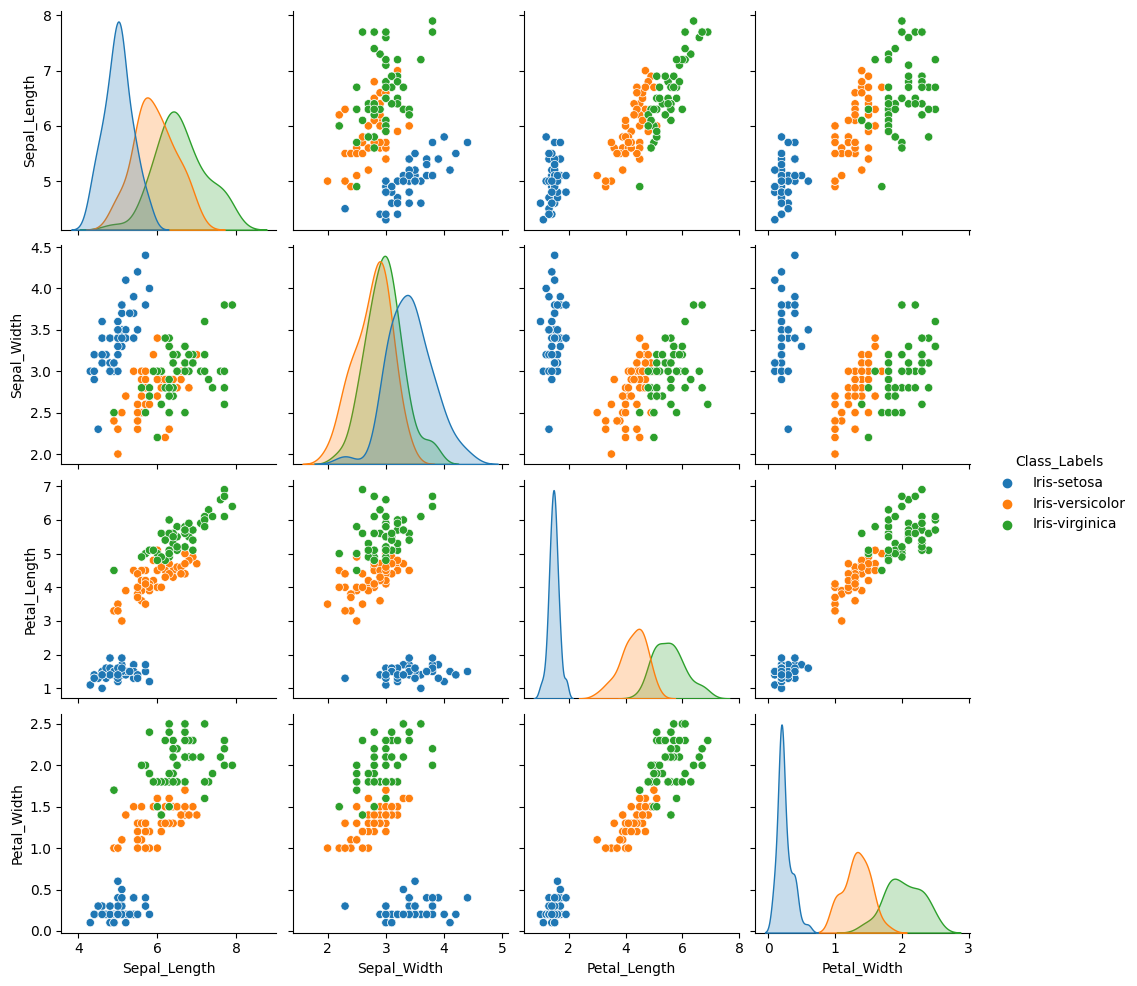

In [19]:
#Visualization and analysis of dataset
sns.pairplot(df, hue= 'Class_Labels')

SEPARATING INPUT COLUMNS FROM OUTPUT COLUMNS

In [21]:
#Separate data features nand target
data = df.values

X = data[:,0:4]
Y= data [:,4]
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

SPLITING THE DATA INTO TRAINING AND TESTING DATASET

In [23]:
#split the data for training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)
print(y_test)

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


MODELS


MODEL-1: SUPPORT VECTOR MACHINE

In [24]:
#algo
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score
model_svc= SVC()
model_svc.fit(x_train, y_train)


SVC()

In [25]:
#1st prediction
prediction1= model_svc.predict(x_test)

#calculatie the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction1)*100)

#print the output
for i in range( len(prediction1) ):
  print(y_test[i],prediction1[i])

100.0
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa


MODEL-2:LOGISTIC REGRESSION

In [26]:
#algo
from sklearn.linear_model import LogisticRegression
model_LR= LogisticRegression()
model_LR.fit(x_train, y_train)

LogisticRegression()

In [27]:
#2nd prediction
prediction2= model_LR.predict(x_test)

#calculate accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction2)*100)

#print the output
for i in range( len(prediction1) ):
  print(y_test[i],prediction2[i])

100.0
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa


MODEL-3: DECISION TREE CLASSIFIER


In [28]:
#algo
from sklearn.tree import DecisionTreeClassifier
model_DTC= DecisionTreeClassifier()
model_DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
#3rd prediction
prediction3= model_DTC.predict(x_test)

#calculate accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction3)*100)

#print the output
for i in range( len(prediction1) ):
  print(y_test[i],prediction3[i])

100.0
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa


DETAILED CLASSIFICATION REPORT

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

